## Intersection of CCLs in both CNV and CRISPR gene effect data

In this step, we would filter two huge dataset (CNV and CRISPR gene effect data) and only keep the intersected CCLs that are tested in both dataset.

**Input**
- Sanger CNV data with mapped BROAD ID: **cnv_sanger_entrezID_broadID.csv**
- CRISPR gene effect data with mapped BROAD ID: **crispr_broad_entrezID_broadID.csv**

**Output**
- Sanger CNV data with mapped Entrez ID and BROAD ID (703 CCLs): cnv_sanger_tidy.csv
- BROAD CRISPR gene effect data with mapped Entrez ID and BROAD ID (703 CCLs): crispr_broad_tidy.csv

In [1]:
## Import modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
## Load required data

## Sanger CNV
cnv_sanger = pd.read_csv('/Users/amy/Desktop/SyntheticLethalityProject/1_data_processing/02_BROAD_ID_mapping/cnv_sanger_entrezID_broadID.csv', index_col=None, low_memory=False)
## BROAD CRISPR gene effect
crispr_broad = pd.read_csv('/Users/amy/Desktop/SyntheticLethalityProject/1_data_processing/02_BROAD_ID_mapping/crispr_broad_entrezID_broadID.csv', index_col=None)

Number of shared CCLs in both dataset.

In [3]:
cnv_model = set(cnv_sanger['BROAD_ID'])
crispr_model = set(crispr_broad['BROAD_ID'])

model_shared = cnv_model.intersection(crispr_model)
print('Number of cell lines models in CRISPR screening data:', len(crispr_model))
print('Number of cell lines models in Sanger CNV data:', len(cnv_model))
print("Number of overlapping cell line models:", len(model_shared))

Number of cell lines models in CRISPR screening data: 992
Number of cell lines models in Sanger CNV data: 1240
Number of overlapping cell line models: 703


Keep the shared CCLs (filter those that are not tested in both dataset).

In [4]:
cnv_sanger_f = cnv_sanger[cnv_sanger['BROAD_ID'].isin(model_shared)]
crispr_broad_f = crispr_broad[crispr_broad['BROAD_ID'].isin(model_shared)]

print("Number of CCLs in CNV data after filtering:", cnv_sanger_f.shape[0]) 
# Duplicate samples are in CNV data set
print("Number of CCLs in CRISPR data after filtering:", crispr_broad_f.shape[0])

Number of CCLs in CNV data after filtering: 768
Number of CCLs in CRISPR data after filtering: 703


Thus, the above result shows that there are duplicated samples in CNV data.

We would look into the duplicated samples:

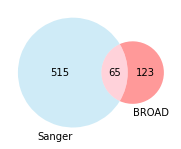

In [5]:
## First, look into the distribution of cell line models from Sanger and Broad source

s_model = cnv_sanger_f[cnv_sanger_f['source'] == 'Sanger'].BROAD_ID
b_model = cnv_sanger_f[cnv_sanger_f['source'] == 'Broad'].BROAD_ID

## Venn diagram to show the distribution of duplicates 
from matplotlib_venn import venn2
f, ax = plt.subplots(figsize=(3,3))
# create a Venn diagram for the two sets
v = venn2([set(cnv_sanger_f[cnv_sanger_f.source == 'Sanger']['BROAD_ID']), 
           set(cnv_sanger_f[cnv_sanger_f.source == 'Broad']['BROAD_ID'])], ['Sanger','BROAD'], ax=ax, set_colors=['skyblue','red'])

for text in v.set_labels: text.set_fontsize(10) # change label size
for text in v.subset_labels: text.set_fontsize(10) # change number size

For the **65 duplicates**, we will only keep cell lines from Sanger, leaving 123 BROAD remain. 

In [6]:
## Remove all the duplicates in CNV data
cnv_sanger_rm_dup = cnv_sanger_f.drop_duplicates(subset = ['SangerModelID'], keep = False)

## Only keep Sanger cell lines that are duplicates 
cnv_dup = cnv_sanger_f[cnv_sanger_f.duplicated(subset = ['SangerModelID'], keep = False)]
cnv_dup = cnv_dup[cnv_dup['source'] == "Sanger"]

## Combine two dataset
cnv_sanger_f_unique = pd.concat([cnv_sanger_rm_dup, cnv_dup], ignore_index = True)

print("Number of cell lines in CNV data:", cnv_sanger_f_unique.shape[0])
cnv_sanger_f_unique[:2]


Number of cell lines in CNV data: 703


,SangerModelID,BROAD_ID,source,symbol,1,29974,2,144568,127550,53947,...,9183,55055,11130,7789,158586,79364,79699,7791,23140,26009
0,SIDM00980,ACH-000948,Sanger,NaN,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,...,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral
1,SIDM01529,ACH-000011,Broad,NaN,Neutral,Neutral,Loss,Neutral,Neutral,Neutral,...,Neutral,Neutral,Neutral,Gain,Gain,Neutral,Neutral,Neutral,Neutral,Neutral


In [7]:
## Save the tidied up data
## Sanger CNV
cnv_sanger_f_unique.to_csv('/Users/amy/Desktop/SyntheticLethalityProject/1_data_processing/03_intersection_of_CCLs/cnv_sanger_tidy.csv', index=False)

## BROAD CRISPR gene effect 
crispr_broad_f.to_csv('/Users/amy/Desktop/SyntheticLethalityProject/1_data_processing/03_intersection_of_CCLs/crispr_broad_tidy.csv', index=False)